In [18]:
import cv2 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [36]:
# Face classifier

# kontrola na Ivorovi a Borovanskom len tak zo srandy

# Default - nasiel oboch
face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")

# Alt - nenasiel Borovanskeho
#face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml")

# Alt 2 - nenasiel Borovanskeho
#face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_alt2.xml")

# Alt tree - nenasiel ani jedneho
#face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_alt_tree.xml")
  
# Eye classiefier
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') 

(262, 295, 3)
[[86 67 84 84]]


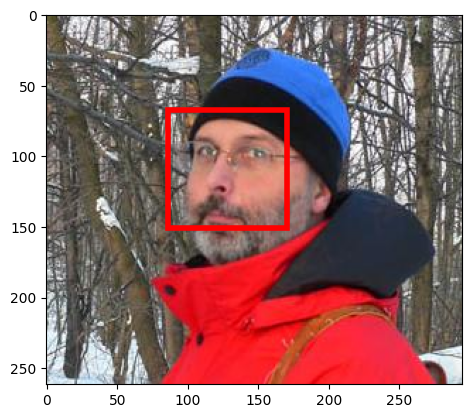

In [38]:
# capture frames from a camera
#cap = cv2.VideoCapture(0)
  
fig, ax = plt.subplots()
  
# reads frames from a camera
#ret, img = cap.read() 
img = cv2.imread("DAI/big/Peter Borovansky.jpg")
#img = cv2.imread("DAI/big/Ivor Uhliarik.jpg")
print(img.shape)
    
# convert to gray scale of each frames
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
ax.imshow(img2)
    
  
# Detects faces of different sizes in the input image
faces = face_cascade.detectMultiScale(gray, 1.1, 9)
print(faces)
  
for (x,y,w,h) in faces:
    # To draw a rectangle in a face
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
    ax.add_patch(Rectangle((x, y), w, h,
                           edgecolor='red',
                           facecolor='none',
                           lw=4))
    #roi_gray = gray[y:y+h, x:x+w]
    #roi_color = img[y:y+h, x:x+w]
  
    # Detects eyes of different sizes in the input image
    #eyes = eye_cascade.detectMultiScale(roi_gray) 
 
    #To draw a rectangle in eyes
    #for (ex,ey,ew,eh) in eyes:
        #cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2)
  
#cv2.imshow('img',img)
plt.show()

  
# Close the window
#cap.release()
  
# De-allocate any associated memory usage
#cv2.destroyAllWindows() 